# Best Days to go to the gym?

Being a workout addcit, I am going to determine the best days to go the gym using the gradient descent algorithim. It will take data from a campus gym that has 60,000 observations, with each observation giving us the number of people present at the gym. Using all the features available and implementing the gradient descent algorithim on it we can determine the best days to go to have a good workout and minimize the time in the gym.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
gym_data = pd.read_csv('crowdness_gym_data.csv')
gym_data.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [ ]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [ ]:
gym_data_copy = gym_data.copy()
gym_data_copy = pd.get_dummies(gym_data_copy, columns=['day_of_week', 'hour', 'is_weekend', 'is_holiday', 'is_start_of_semester', 'is_during_semester', 'month'])
gym_data_copy.drop(['date','timestamp'], axis=1, inplace=True)
gym_data_copy.head()

,number_people,temperature,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_0,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,37,71.76,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,45,71.76,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,40,71.76,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,44,71.76,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,45,71.76,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
correlation_matrix = gym_data_copy.corr()
# Get the correlations with 'number_people'
number_people_corr = correlation_matrix['number_people']
# Filter for correlations above a certain threshold (e.g., 0.5)
high_corr_features = number_people_corr[(number_people_corr) > 0.15]

# Display the highly correlated features
print(high_corr_features)

number_people             1.000000
temperature               0.373327
hour_17                   0.181333
hour_18                   0.185264
hour_19                   0.150486
is_weekend_0              0.173958
is_start_of_semester_1    0.182683
is_during_semester_1      0.335350
month_9                   0.151903
Name: number_people, dtype: float64


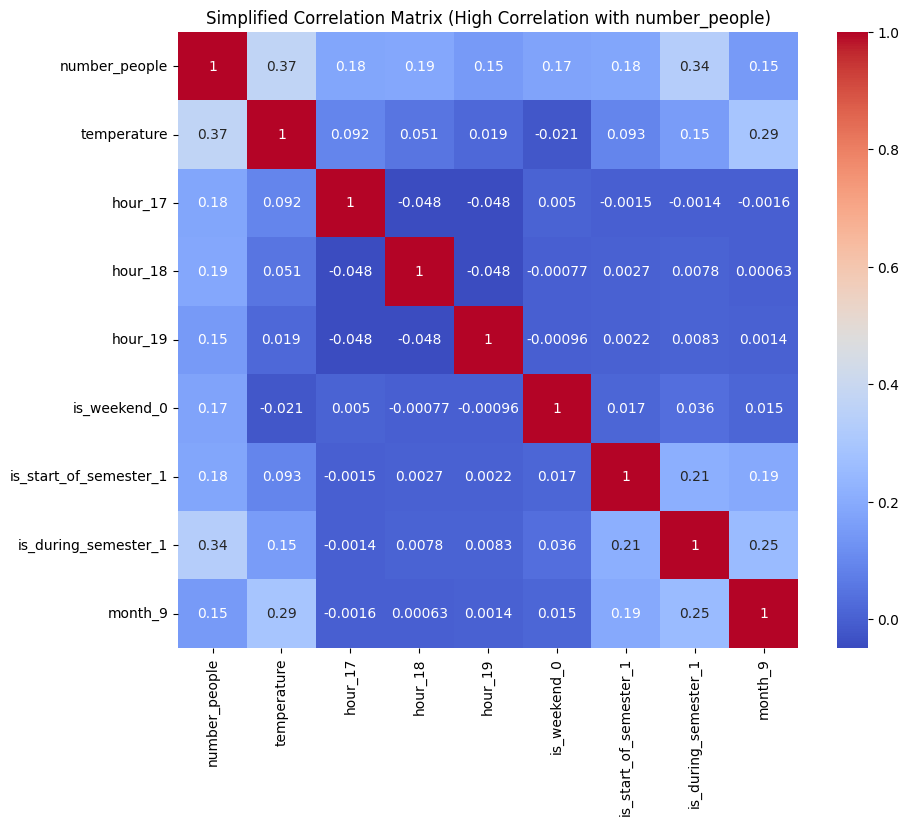

In [ ]:
# Create a list of highly correlated features including 'number_people'
high_corr_features_list = high_corr_features.index.tolist()

# Filter the original correlation matrix to include only these features
filtered_corr_matrix = correlation_matrix.loc[high_corr_features_list, high_corr_features_list]

# Create a smaller heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Simplified Correlation Matrix (High Correlation with number_people)')
plt.show()

It looks like these features have the highest correlation with the number of people in the gym, meaning thee features determine if the gym will be packed the most. Since the correlation is positive it means the most amount of people will be at the gym at this time of the day,week, semester and month.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [ ]:
X = gym_data_copy[high_corr_features_list]
y = gym_data_copy['number_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# let's test out the model for different max iterations
max_iter = [100,1000,10000]
for i in max_iter:
    sdgr_model = SGDRegressor(max_iter=i, tol=1e-3, random_state=42)
    sdgr_model.fit(X_train, y_train)
    y_pred = sdgr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    dataframe = pd.DataFrame({'max_iter': [i], 'MSE': [mse], 'R2': [r2], 'MAE': [mae]})
    print(dataframe)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


   max_iter           MSE           R2           MAE
0       100  2.055737e+08 -397744.1646  12684.471741
   max_iter       MSE        R2       MAE
0      1000  0.003921  0.999992  0.050653
   max_iter       MSE        R2       MAE
0     10000  0.003921  0.999992  0.050653


We can see that for a max iterations of about 1000 times we got a great score which is equal to the score for max iterations of 10,000 times. Meaning we can use the model with max_iterations = 1000, with a mean sqaure error of 0.003, R2 of 0.999, and mean absolute error of 0.051.

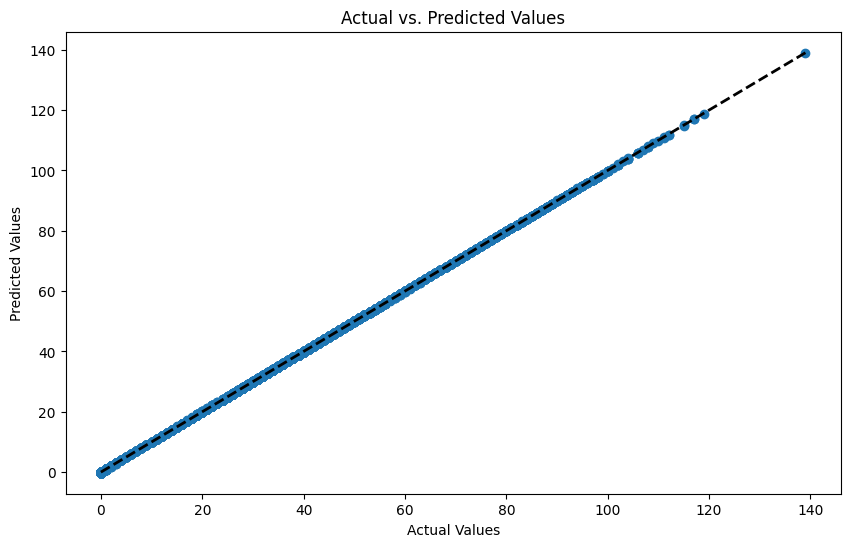

In [ ]:
sdgr_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sdgr_model.fit(X_train, y_train)
y_pred_1000 = sdgr_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1000)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

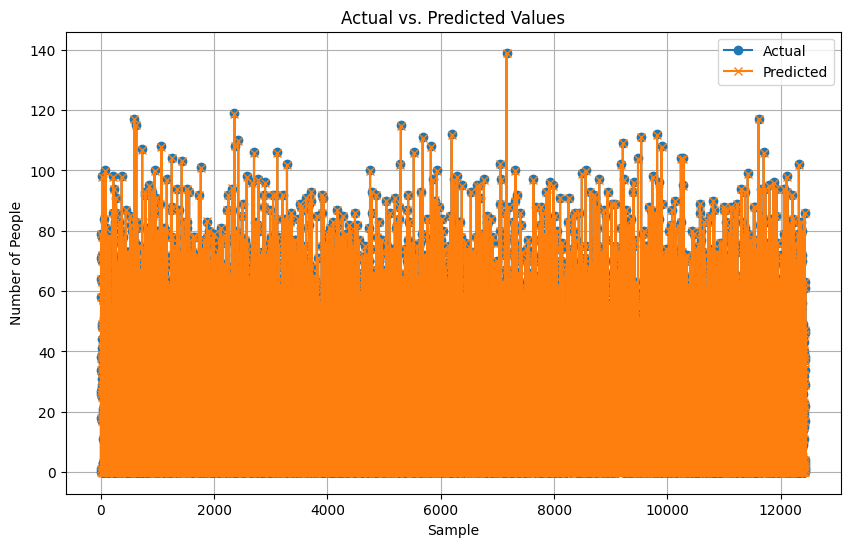

In [ ]:
plt.figure(figsize=(10, 6))

x_values = range(len(y_test))
plt.plot(x_values, y_test, label='Actual', marker='o')
plt.plot(x_values, y_pred_1000, label='Predicted', marker='x')

plt.xlabel('Sample')
plt.ylabel('Number of People')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

-- Epoch 1
Norm: 78954101717.60, NNZs: 9, Bias: 17019046982.654221, T: 49747, Avg. loss: 2840203776244279133863936.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 47968936109.95, NNZs: 9, Bias: 5474130008.427608, T: 99494, Avg. loss: 871486339629730033041408.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 37550851056.46, NNZs: 9, Bias: -13154103681.794783, T: 149241, Avg. loss: 522359704881607177404416.000000
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 23096118875.88, NNZs: 9, Bias: -9874079450.801287, T: 198988, Avg. loss: 313807940096996489035776.000000
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 22151574765.57, NNZs: 9, Bias: -8749103741.455954, T: 248735, Avg. loss: 180504108428501587066880.000000
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 15340120835.54, NNZs: 9, Bias: -5049488369.138118, T: 298482, Avg. loss: 91409488988585087467520.000000
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 7361040710.34, NNZs: 9, Bias: -5085193774.3

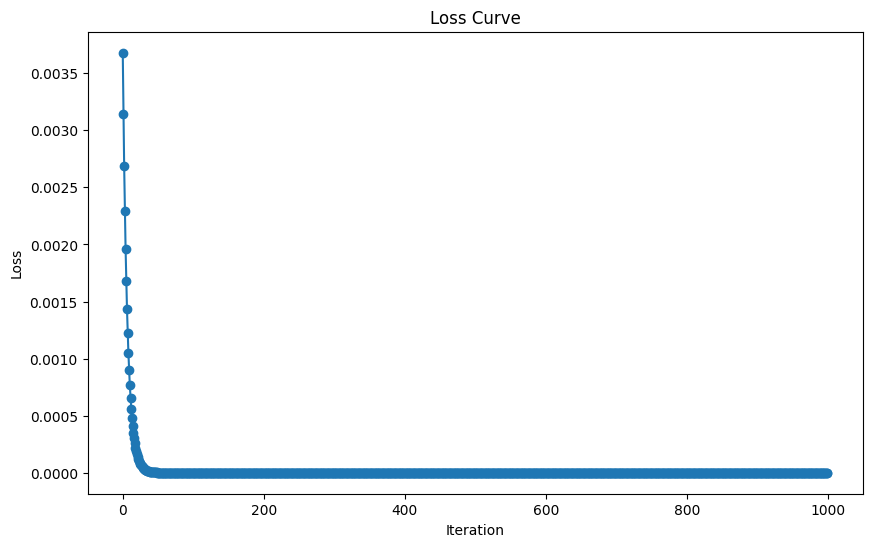

In [ ]:
sdgr_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, verbose=1) # Add verbose=1
sdgr_model.fit(X_train, y_train)
y_pred_1000 = sdgr_model.predict(X_test)

loss_history = []
for epoch in range(1000):  # Adjust the number of epochs as needed
    sdgr_model.partial_fit(X_train, y_train)
    loss_history.append(mean_squared_error(y_train, sdgr_model.predict(X_train)))  # Access the loss after each epoch

plt.figure(figsize=(10, 6))
plt.plot(loss_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


# Overall Interpreatation

Looking at the results of the model, I would say that the model does a good job. The SGDRegressor model has low MSE, MAE and a high R2 value suggest it's strong fit and gives accurate predictions. The loss curve further strengthens this conclusion because it shows the model learn's quickly with a small number of iterations. This suggest's the features we chose were quite accurate in thier ability to predict the outcome. Based on the chosen features I can say that someone who wants to get a good workout in should avoid going between 5PM-8PM, will be busiest during the week, and during the start of the semester in September as well as during the semester.

Now I will try to find the best times to go using the features that have the lowest correlation with number of people at the gym.

In [ ]:
low_corr_features = number_people_corr[(number_people_corr) < 0.15]
print(low_corr_features.sort_values(ascending=True).head(10))

is_during_semester_0     -0.335350
hour_5                   -0.249696
hour_1                   -0.201890
hour_3                   -0.201612
hour_2                   -0.201584
hour_4                   -0.195186
hour_6                   -0.192838
is_start_of_semester_0   -0.182683
is_weekend_1             -0.173958
month_12                 -0.158912
Name: number_people, dtype: float64


I will use the hour_5, is_during_semester_0, is_weekend_1, month_12 as the X_train features for the model and see how well the model performs. If it performs well we can be sure that these features will determine when I should go to the gym.

In [ ]:
low_corr_features_list = low_corr_features.index.tolist()

# Select the columns for X
X = gym_data_copy[low_corr_features_list]
y = gym_data_copy['number_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

sdgr_model = SGDRegressor(alpha=0.001, tol=1e-3, random_state=42, penalty='elasticnet', learning_rate='optimal', loss='huber')
sdgr_model.fit(X_train_scaled, y_train)

y_pred = sdgr_model.predict(X_test_scaled)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

MSE: 230.44416905027188
R2: 0.5541352524414839
MAE: 10.921872324591723


Wow, that was worst than I expected. It seems like the model does not perform well when dealing with these features. The MSE is way above 0, the R2 value is no where near 1 and the MAE value is ~11. I doubt changing the parameters too much will change the error readings by a lot. Let's plot the results to compare the actual vs predicted values.

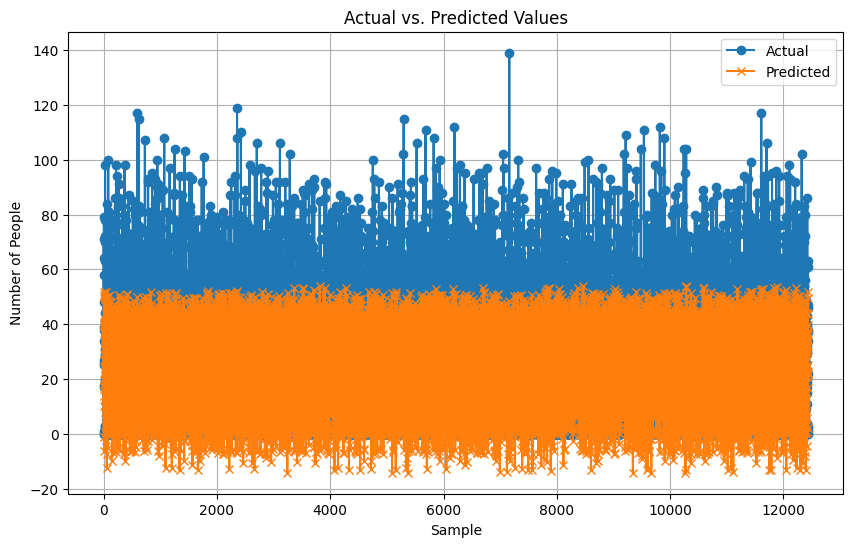

In [ ]:
plt.figure(figsize=(10, 6))

x_values = range(len(y_test))
plt.plot(x_values, y_test, label='Actual', marker='o')
plt.plot(x_values, y_pred, label='Predicted', marker='x')

plt.xlabel('Sample')
plt.ylabel('Number of People')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Looking the plot above we can see that the model does not predict as accurately the times when we should go to the gym vs the time we shouldn't go to the gym. The model is way more accurate in telling us what times we should avoid.

Let's look at the last plot, which will be a loss curve to see how well the loss curve performs for these features.

-- Epoch 1
Norm: 15.67, NNZs: 41, Bias: 26.585595, T: 49747, Avg. loss: 1.096083
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 15.71, NNZs: 41, Bias: 26.725248, T: 99494, Avg. loss: 1.083012
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 15.67, NNZs: 41, Bias: 26.629787, T: 149241, Avg. loss: 1.081758
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 15.64, NNZs: 41, Bias: 26.637895, T: 198988, Avg. loss: 1.081667
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 15.66, NNZs: 42, Bias: 26.664949, T: 248735, Avg. loss: 1.081471
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 15.65, NNZs: 42, Bias: 26.664726, T: 298482, Avg. loss: 1.081444
Total training time: 0.30 seconds.
-- Epoch 7
Norm: 15.63, NNZs: 42, Bias: 26.693259, T: 348229, Avg. loss: 1.081439
Total training time: 0.35 seconds.
-- Epoch 8
Norm: 15.62, NNZs: 42, Bias: 26.654177, T: 397976, Avg. loss: 1.081130
Total training time: 0.40 seconds.
Convergence after 8 epochs took 0.40 seconds
-- Epoch 1
Norm: 15.3

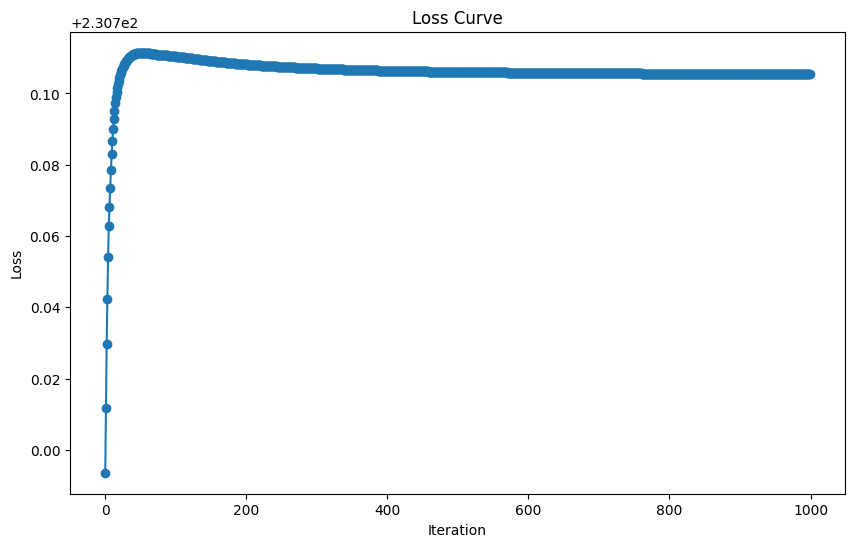

In [ ]:
sdgr_model = SGDRegressor(alpha=0.001, tol=1e-3, random_state=42, penalty='elasticnet', learning_rate='optimal', loss='huber',verbose=1) # Add verbose=1
sdgr_model.fit(X_train_scaled, y_train)
y_pred = sdgr_model.predict(X_test_scaled)

loss_history = []
for epoch in range(1000):  # Adjust the number of epochs as needed
    sdgr_model.partial_fit(X_train_scaled, y_train)
    loss_history.append(mean_squared_error(y_train, sdgr_model.predict(X_train_scaled)))  # Access the loss after each epoch

plt.figure(figsize=(10, 6))
plt.plot(loss_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Conclusion

Looking at the loss curve it clearly indicates the model had a problem learning from the training data. The combination of a sharp increase and a plateau shows the model intially struggled to learn and then got stuck in suboptimal solution. The sharp increase could be due to: high learning rate, model complexity, or exploding gradients. The plateauing could be due to learning rate scheduling or optimization algorithim meaning it could be stuck in a local minimum. Whatever the case it is clear that the model did not predict accurately what times would be best to visit the gym. We might need to use a whole new model as the model might be to complex for the data or just use some common sense to come to a conclusion. Feature engineering might be needed, since they features that were chosen did not have high correlation with the number of people in the gym. We have to keep in mind the following: correlation does not equal causation, indirect relationships, data distribution, model sensitivity, and feature interactions. I have included some new feature in the following cell that could be used to make a better prediction with the SGDRegressor model.

Although we can see that it did tell us what times to avoid with high accuracy since the correlation was strong and positive. It makes sense for us to avoid the gym between  5PM-8PM, during the week, and during the start of the semester in September as well as during the semester.

In [ ]:
# Early Morning Hours
gym_data_copy['is_early_morning'] = (gym_data_copy['hour'] < 8).astype(int)

# Late Night Hours
gym_data_copy['is_late_night'] = (gym_data_copy['hour'] >= 21).astype(int)

# Non-Peak Weekday Hours
gym_data_copy['is_non_peak_weekday'] = ((gym_data_copy['hour'] >= 10) & (gym_data_copy['hour'] <= 16) & (gym_data_copy['is_weekend'] == 0)).astype(int)

# Time Buckets
gym_data_copy['time_bucket'] = pd.cut(gym_data_copy['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
gym_data_copy = pd.get_dummies(gym_data_copy, columns=['time_bucket'])

# Interactions (example)
gym_data_copy['morning_weekday'] = ((gym_data_copy['time_bucket_Morning'] == 1) & (gym_data_copy['is_weekend'] == 0)).astype(int)